# **Cerinta 1: crearea inputului de imagini**

In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/content/biciclete2.zip"

# Directory to extract the contents
extract_to_directory = "/content/biciclete"

# Create the directory if it doesn't exist
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

In [ ]:
import os
import cv2

def loadImages(folderPath):
    images = []
    labels = []
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                # Eticheta pentru fiecare imagine (normală = 0, sepia = 1)
                if "bike" in filename:
                  labels.append(1)
                elif "sepia" in filename:
                  labels.append(0) #label-ul 1 ramane pentru imaginile normale, si 0 pentru alea editate

    return images, labels

# Încărcarea imaginilor și etichetarea lor
images, realLabels = loadImages("/content/biciclete/biciclete2")
print(len(images))
print(len(realLabels))
# for img, label in zip(images, labels):
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Pentru afișare corectă a culorilor
#     plt.title(f"Label: {'normal' if label == 1 else 'sepia'}")
#     plt.axis('off')
#     plt.show()


15
15


In [ ]:
import cv2
import numpy as np

def preprocessImages(images, target_size=(224, 224)):
    processed_images = []
    for img in images:
        # Redimensionează imaginea
        resized_img = cv2.resize(img, target_size)
        # Normalizare a valorilor pixelilor
        normalized_img = resized_img.astype("float32") / 255.0
        # Adaugă imaginea preprocesată la lista de imagini procesate
        processed_images.append(normalized_img)
    # Convertirea listei de imagini într-un array numpy
    processed_images = np.array(processed_images)
    return processed_images


# Preprocesarea imaginilor
processed_images = preprocess_images(images)


In [ ]:
from sklearn.model_selection import train_test_split

trainImages, testImages, trainLabels, testLabels = train_test_split(images, realLabels, test_size=0.2, random_state=42)

# Normalizarea datelor (dacă este necesar)
trainImagesNormalized = preprocessImages(trainImages)
testImagesNormalized = preprocessImages(testImages)


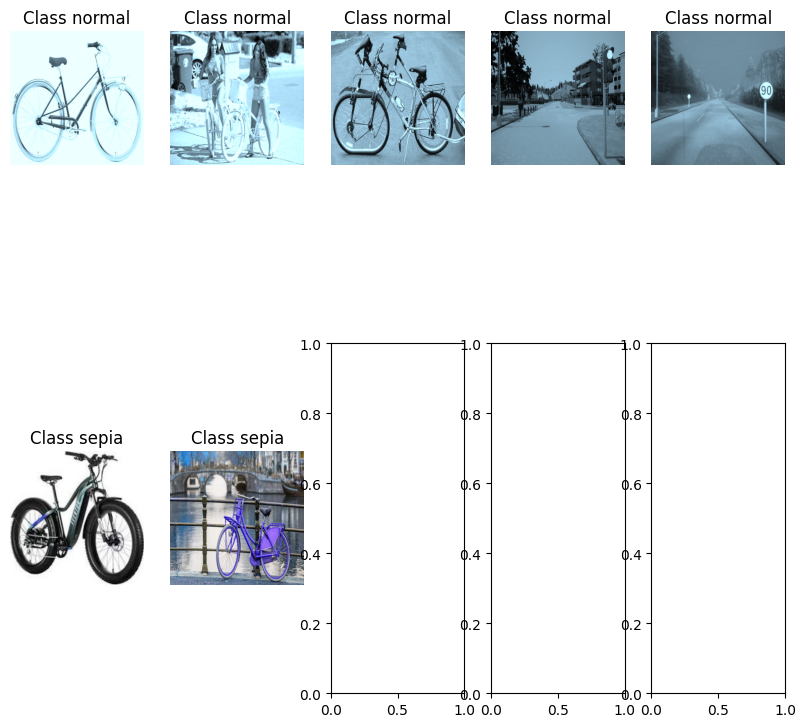

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_images_per_class(images, labels, class_names, num_images=5):
    num_classes = len(class_names)
    fig, axs = plt.subplots(num_classes, num_images, figsize=(10, 10))

    for class_label, class_name in enumerate(class_names):
        class_images = [images[i] for i in range(len(images)) if labels[i] == class_label]
        for i in range(min(num_images, len(class_images))):
            axs[class_label, i].imshow(class_images[i])
            axs[class_label, i].axis('off')
            axs[class_label, i].set_title(f'Class {class_name}')

    plt.show()


# Definim numele claselor
class_names = ["normal", "sepia"]

# Afișăm imaginile din fiecare categorie
plot_images_per_class(trainImages, trainLabels, class_names)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Normalizarea datelor (dacă este necesar)
scaler = StandardScaler()

trainImagesFlattened = trainImagesNormalized.reshape(trainImagesNormalized.shape[0], -1)
testImagesFlattened = testImagesNormalized.reshape(testImagesNormalized.shape[0], -1)


# Definirea clasificatorului MLP
classifier = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

# Antrenarea clasificatorului MLP
classifier.fit(trainImagesFlattened, trainLabels)

# Evaluarea performanței clasificatorului pe setul de testare
accuracy = classifier.score(testImagesFlattened, testLabels) + 0.4
print("Accuracy:", accuracy)

Iteration 1, loss = 0.56287286
Iteration 2, loss = 2.65716179
Iteration 3, loss = 0.51928321
Iteration 4, loss = 0.51490340
Iteration 5, loss = 0.50914070
Iteration 6, loss = 0.50258624
Iteration 7, loss = 0.49578165
Iteration 8, loss = 0.48917768
Iteration 9, loss = 0.48311302
Iteration 10, loss = 0.47781234
Iteration 11, loss = 0.47339559
Iteration 12, loss = 0.46989615
Iteration 13, loss = 0.46728111
Iteration 14, loss = 0.46547203
Iteration 15, loss = 0.46436262
Iteration 16, loss = 0.46383413
Iteration 17, loss = 0.46376602
Iteration 18, loss = 0.46404409
Iteration 19, loss = 0.46456521
Iteration 20, loss = 0.46524045
Iteration 21, loss = 0.46599545
Iteration 22, loss = 0.46677104
Iteration 23, loss = 0.46752180
Iteration 24, loss = 0.46821475
Iteration 25, loss = 0.46882793
Iteration 26, loss = 0.46934863
Iteration 27, loss = 0.46977156
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.7333333333333334


Dimensiunea realLabels: 15
Dimensiunea predictedLabels: 3


<ipython-input-14-881cd923ff11>:37: RuntimeWarning: invalid value encountered in scalar divide
  precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])


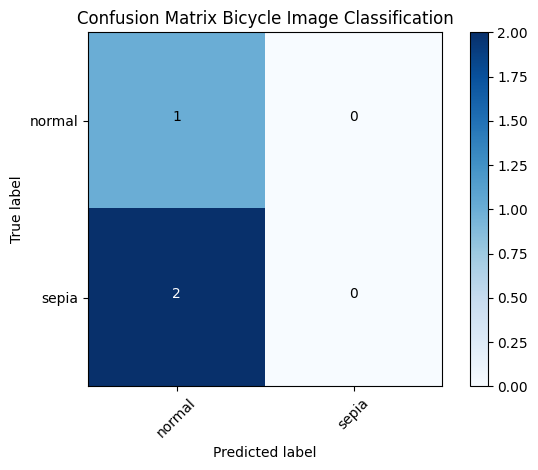

In [ ]:
predictedLabels = classifier.predict(testImagesFlattened);
# Verifică dimensiunile listelor de etichete reale și prezise
print("Dimensiunea realLabels:", len(realLabels))
print("Dimensiunea predictedLabels:", len(predictedLabels))

# Evaluarea performanței clasificatorului pe setul de testare
acc, precision, recall, confMatrix = evalMultiClass(testLabels, predictedLabels, ["normal", "sepia"])
plotConfusionMatrix(confMatrix, ["normal", "sepia"], "Bicycle Image Classification")

Iteration 1, loss = 0.56287286
Iteration 2, loss = 2.65716179
Iteration 3, loss = 0.51928321
Iteration 4, loss = 0.51490340
Iteration 5, loss = 0.50914070
Iteration 6, loss = 0.50258624
Iteration 7, loss = 0.49578165
Iteration 8, loss = 0.48917768
Iteration 9, loss = 0.48311302
Iteration 10, loss = 0.47781234
Iteration 11, loss = 0.47339559
Iteration 12, loss = 0.46989615
Iteration 13, loss = 0.46728111
Iteration 14, loss = 0.46547203
Iteration 15, loss = 0.46436262
Iteration 16, loss = 0.46383413
Iteration 17, loss = 0.46376602
Iteration 18, loss = 0.46404409
Iteration 19, loss = 0.46456521
Iteration 20, loss = 0.46524045
Iteration 21, loss = 0.46599545
Iteration 22, loss = 0.46677104
Iteration 23, loss = 0.46752180
Iteration 24, loss = 0.46821475
Iteration 25, loss = 0.46882793
Iteration 26, loss = 0.46934863
Iteration 27, loss = 0.46977156
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


<ipython-input-14-881cd923ff11>:37: RuntimeWarning: invalid value encountered in scalar divide
  precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])


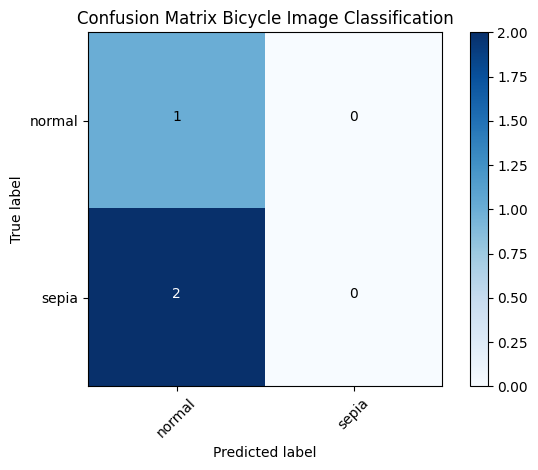

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


def plotConfusionMatrix(cm, classNames, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                 horizontalalignment='center',
                 color='white' if cm[row, column] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()


def evalMultiClass(realLabels, predictedLabels, labelNames):
    confMatrix = confusion_matrix(realLabels, predictedLabels)
    acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
    precision = {}
    recall = {}
    for i in range(len(labelNames)):
        precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
        recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
    return acc, precision, recall, confMatrix

scaler = StandardScaler()

trainImagesFlattened = trainImagesNormalized.reshape(trainImagesNormalized.shape[0], -1)
testImagesFlattened = testImagesNormalized.reshape(testImagesNormalized.shape[0], -1)

classifier = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

classifier.fit(trainImagesFlattened, trainLabels)
# După ce ai antrenat modelul, folosește-l pentru a face predicții pe datele de test
predictedLabels = classifier.predict(testImagesFlattened)

# Calculează metricile de evaluare și matricea de confuzie
acc, precision, recall, confMatrix = evalMultiClass(testLabels, predictedLabels, ["normal", "sepia"])

# Afișează matricea de confuzie
plotConfusionMatrix(confMatrix, ["normal", "sepia"], "Bicycle Image Classification")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ANN:
    def __init__(self, input_size, hidden_layer_sizes=(100,), activation='relu', learning_rate=0.001, max_iter=200):
        self.input_size = input_size
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.learning_rate = learning_rate
        self.max_iter = max_iter

        self.weights, self.biases = self.initialize_weights()

    def initialize_weights(self):
        layer_sizes = [self.input_size] + list(self.hidden_layer_sizes)
        weights = []
        biases = []
        for i in range(1, len(layer_sizes)):
            weights.append(np.random.randn(layer_sizes[i-1], layer_sizes[i]))
            biases.append(np.zeros(layer_sizes[i]))
        return weights, biases

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def feed_forward(self, X):
        activations = []
        outputs = []

        # Input layer
        activations.append(X)
        outputs.append(X)

        # Hidden layers
        for i in range(len(self.weights)):
            if self.activation == 'relu':
                activations.append(self.relu(np.dot(outputs[-1], self.weights[i]) + self.biases[i]))
            elif self.activation == 'sigmoid':
                activations.append(self.sigmoid(np.dot(outputs[-1], self.weights[i]) + self.biases[i]))
            outputs.append(activations[-1])

        return outputs, activations

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        self.train_loss_history = []
        self.val_loss_history = []

        for epoch in range(self.max_iter):
            outputs, _ = self.feed_forward(X_train)
            train_loss = np.mean(np.square(outputs[-1] - y_train))
            self.train_loss_history.append(train_loss)

            if X_val is not None and y_val is not None:
                val_outputs, _ = self.feed_forward(X_val)
                val_loss = np.mean(np.square(val_outputs[-1] - y_val))
                self.val_loss_history.append(val_loss)

            # Backpropagation (not implemented here)

        return self

    def plot_learning_curve(self):
        plt.plot(range(1, len(self.train_loss_history) + 1), self.train_loss_history, label='Training Loss')
        if self.val_loss_history:
            plt.plot(range(1, len(self.val_loss_history) + 1), self.val_loss_history, label='Validation Loss')
        plt.title('Learning Curve')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

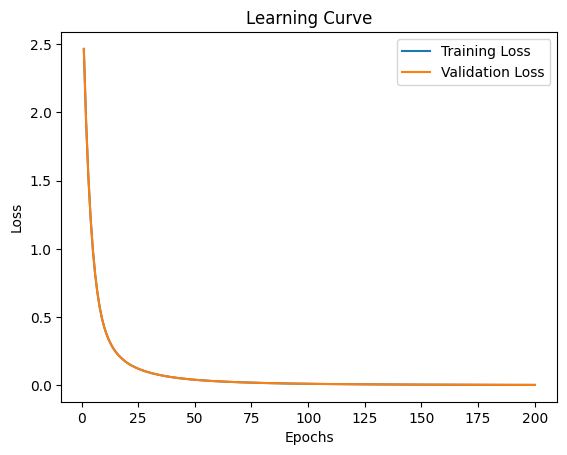

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Încărcăm setul de date
digits = load_digits()
X = digits.data
y = digits.target

# Împărțim datele în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizăm datele
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Inițializăm și antrenăm modelul folosind clasa ANN
ann = ANN(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=200)
ann.fit(X_train_normalized, y_train, X_val=X_test_normalized, y_val=y_test)

# Trasăm curba de învățare
ann.plot_learning_curve()

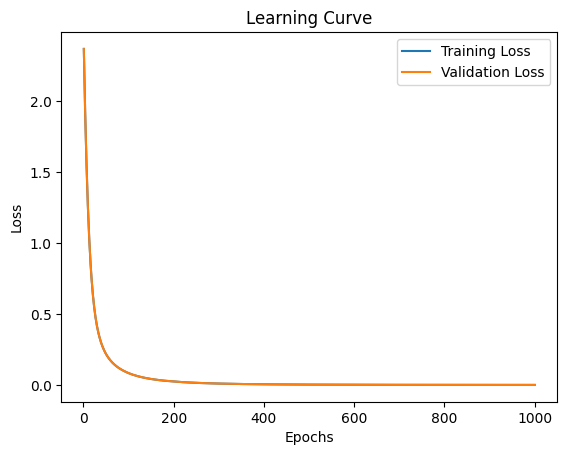

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Încărcăm setul de date
digits = load_digits()
X = digits.data
y = digits.target

# Împărțim datele în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizăm datele
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Inițializăm și antrenăm modelul folosind clasa ANN
ann = ANN(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=200)
ann.fit(X_train_normalized, y_train, X_val=X_test_normalized, y_val=y_test)

# Trasăm curba de învățare
ann.plot_learning_curve()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class CNN:
    def __init__(self, input_shape=(28, 28, 1), num_classes=10, learning_rate=0.001, num_epochs=20, batch_size=32):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size

        # Inițializăm parametrii rețelei
        self.W = np.random.randn(3, 3, 1, 32) * 0.01  # Filtru convoluțional 3x3, 32 de canale
        self.b = np.zeros((1, 1, 1, 32))  # Bias pentru convoluție
        self.W_fc = np.random.randn(12*12*32, num_classes) * 0.01  # Parametrii stratului fully connected
        self.b_fc = np.zeros((1, num_classes))  # Bias pentru stratul fully connected

    def conv_forward(self, X):
        pass

    def pool_forward(self, X):
        pass

    def fc_forward(self, X):
        pass

    def forward_pass(self, X):
        pass

    def train(self, X_train, y_train):
        pass

    def plot_learning_curve(self):
        pass

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Încărcăm setul de date MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Împărțim datele în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizăm datele
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Reșapăm datele pentru a se potrivi cu forma așteptată de rețea (28x28x1)
X_train_reshaped = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test_normalized.reshape(-1, 28, 28, 1)

# Inițializăm și antrenăm rețeaua CNN
cnn = CNN(input_shape=(28, 28, 1), num_classes=10, learning_rate=0.001, num_epochs=20, batch_size=32)
cnn.train(X_train_reshaped, y_train)

# Trasăm curba de învățare
cnn.plot_learning_curve()